# Data Preprocessing
## Imports and setup

In [2]:
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path
import os

In [19]:
load_dotenv()  # Load environment variables from .env file
PARENT = Path(os.getcwd()).parent

DATA_DIR_RAW = Path(os.getenv("DATA_DIR_RAW"))
DATA_DIR_RAW = PARENT / DATA_DIR_RAW

DATA_DIR_PROCESSED = Path(os.getenv("DATA_DIR_PROCESSED"))
DATA_DIR_PROCESSED = PARENT / DATA_DIR_PROCESSED

## Preprocessing

In [31]:
df = pd.read_csv(DATA_DIR_RAW / "loan_data_cols_changed.csv")
df.head()

,credit_policy,purpose,interest_rate,installment,log_annual_income,debt_income_ratio,fico,days_with_credit_line,revolve_balance,revolve_utilized,inquiries_last_6_mon,delinquent_2_yrs,public_recs,default
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [21]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   credit_policy          9578 non-null   int64  
 1   purpose                9578 non-null   object 
 2   interest_rate          9578 non-null   float64
 3   installment            9578 non-null   float64
 4   log_annual_income      9578 non-null   float64
 5   debt_income_ratio      9578 non-null   float64
 6   fico                   9578 non-null   int64  
 7   days_with_credit_line  9578 non-null   float64
 8   revolve_balance        9578 non-null   int64  
 9   revolve_utilized       9578 non-null   float64
 10  inquiries_last_6_mon   9578 non-null   int64  
 11  delinquent_2_yrs       9578 non-null   int64  
 12  public_recs            9578 non-null   int64  
 13  default                9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB

credit_policy            0
purpose                  0
interest_rate            0
installment              0
log_annual_income        0
debt_income_ratio        0
fico                     0
days_with_credit_line    0
revolve_balance          0
revolve_utilized         0
inquiries_last_6_mon     0
delinquent_2_yrs         0
public_recs              0
default                  0
dtype: int64

- No missing values
- all columns have the correct data type

In [22]:
df.describe()

,credit_policy,interest_rate,installment,log_annual_income,debt_income_ratio,fico,days_with_credit_line,revolve_balance,revolve_utilized,inquiries_last_6_mon,delinquent_2_yrs,public_recs,default
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Visual checks

In [23]:
import matplotlib.pyplot as plt

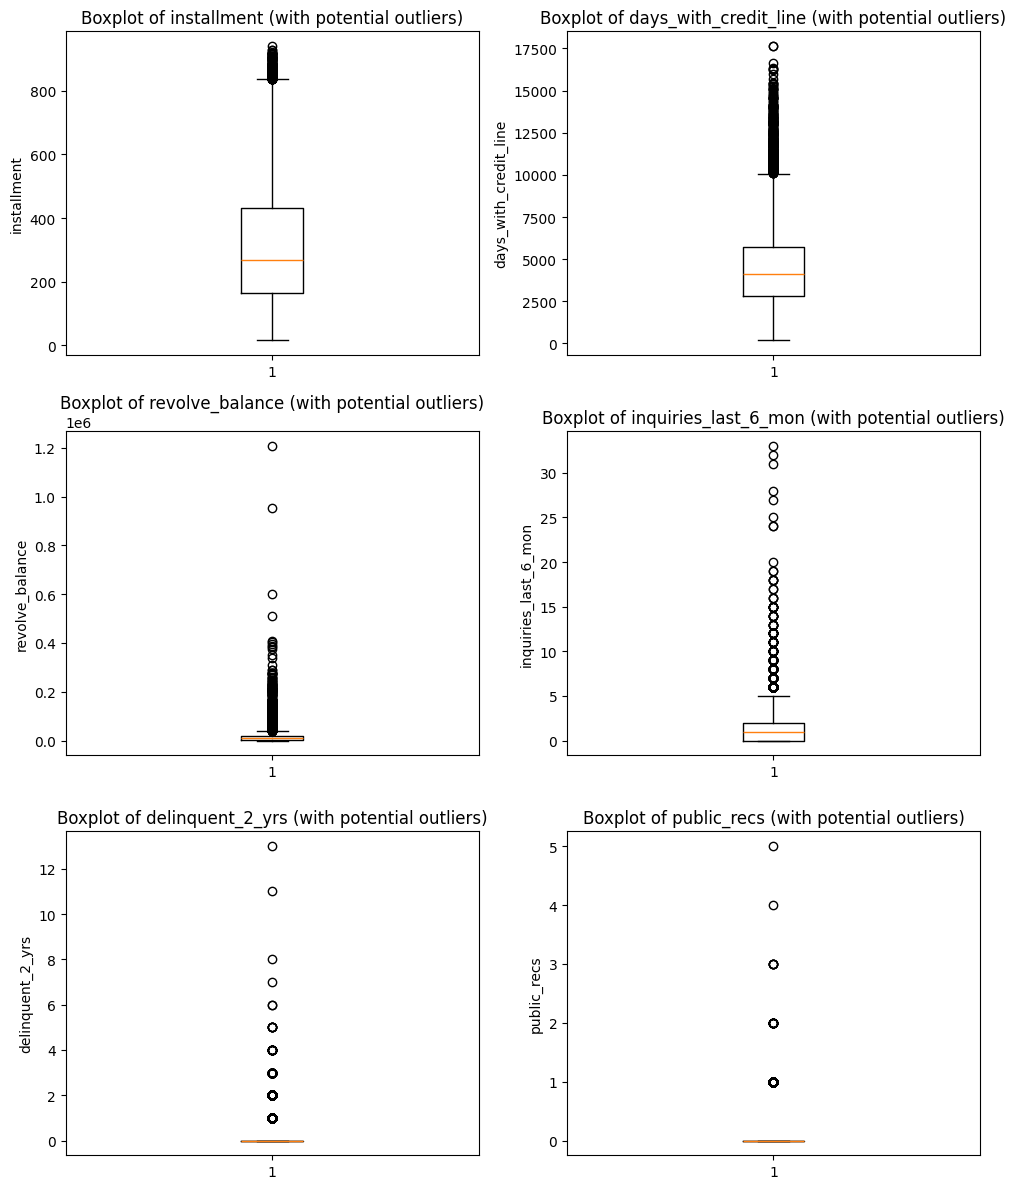

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes = axes.flatten()

cols_to_check = ['installment', 'days_with_credit_line', 'revolve_balance', 'inquiries_last_6_mon',	'delinquent_2_yrs',	'public_recs']

for i, col in enumerate(cols_to_check):
    axes[i].boxplot(df[col], vert=True)
    axes[i].set_title(f'Boxplot of {col} (with potential outliers)')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

### Detect Outliers - IQR and z-score

In [ ]:
cols = ['interest_rate', 'installment', 'log_annual_income', 'debt_income_ratio', 'days_with_credit_line', 'revolve_balance', 'revolve_utilized', 'inquiries_last_6_mon', 'delinquent_2_yrs', 'public_recs']

- `credit_policy` and `purpose` are categorical columns, hence they are not included.
- `fico` is not included as all values fall within the FICO range.

In [ ]:
def assign_thresholds(skew, kurt):
    """
    Assigns IQR (k) and z-score threshold based on skewness and kurtosis.
    """
    # Near-normal
    if abs(skew) < 1 and abs(kurt) < 3:
        return 1.5, 3  # standard boxplot + z-score
    
    # Moderate skew / heavy tails
    elif abs(skew) < 3 and abs(kurt) < 20:
        return 2.0, 3.5
    
    # Extreme skew/heavy tails
    else:
        return 3.0, np.nan  # z-scores unreliable
    
# Build the dictionary
thresholds = {}
for col in cols:
    skew = df[col].skew()
    kurt = df[col].kurt()
    k_val, z_val = assign_thresholds(skew, kurt)
    thresholds[col] = {
        "skewness": skew,
        "kurtosis": kurt,
        "iqr_k": k_val,
        "zscore_threshold": z_val
    }

# Convert to DataFrame for readability
thresholds_df = pd.DataFrame(thresholds).T
thresholds_df
    

,skewness,kurtosis,iqr_k,zscore_threshold
interest_rate,0.164420,-0.224324,1.5,3.0
installment,0.912522,0.137908,1.5,3.0
log_annual_income,0.028668,1.609004,1.5,3.0
debt_income_ratio,0.023941,-0.900355,1.5,3.0
days_with_credit_line,1.155748,1.937861,2.0,3.5
revolve_balance,11.161058,259.655203,3.0,NaN
revolve_utilized,0.059985,-1.116467,1.5,3.0
inquiries_last_6_mon,3.584151,26.288131,3.0,NaN
delinquent_2_yrs,6.061793,71.433182,3.0,NaN
public_recs,5.126434,38.781007,3.0,NaN


In [48]:
def detect_outliers_iqr(series: pd.Series, k: float = 1.5) -> pd.Series:
    """Return boolean mask where True indicates an outlier by IQR rule.
    Parameters
    ----------
    series : pd.Series
        Numeric series to evaluate.
    k : float
        Multiplier for IQR to set fences (default 1.5).
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return (series < lower) | (series > upper)

In [51]:
def detect_outliers_zscore(series: pd.Series, threshold: float = 3.0) -> pd.Series:
    """Return boolean mask where True indicates |z| > threshold."""
    mu = series.mean()
    sigma = series.std(ddof=0)
    z = (series - mu) / (sigma if sigma != 0 else 1.0)
    return z.abs() > threshold

In [54]:
outlier_results = {}

for col in thresholds_df.index:
    series = df[col]

    # Get thresholds for this column
    k_val = thresholds_df.loc[col, "iqr_k"]
    z_val = thresholds_df.loc[col, "zscore_threshold"]

    # Apply IQR rule
    outliers_iqr = detect_outliers_iqr(series, k=k_val)

    # Apply z-score rule (only if threshold is not NaN)
    if not pd.isna(z_val):
        outliers_z = detect_outliers_zscore(series, threshold=z_val)
    else:
        outliers_z = pd.Series([False] * len(series), index=series.index)

    # Store masks in dictionary
    outlier_results[col] = {
        "iqr_outliers": outliers_iqr,
        "zscore_outliers": outliers_z,
        "combined_outliers": outliers_iqr | outliers_z
    }

In [55]:
# Example: create a DataFrame showing how many outliers each method flagged
summary = pd.DataFrame({
    col: {
        "IQR count": outlier_results[col]["iqr_outliers"].sum(),
        "Z-score count": outlier_results[col]["zscore_outliers"].sum(),
        "Combined count": outlier_results[col]["combined_outliers"].sum()
    }
    for col in outlier_results
}).T

summary

,IQR count,Z-score count,Combined count
interest_rate,51,21,51
installment,236,0,236
log_annual_income,238,86,238
debt_income_ratio,0,0,0
days_with_credit_line,181,72,181
revolve_balance,409,0,409
revolve_utilized,0,0,0
inquiries_last_6_mon,141,0,141
delinquent_2_yrs,1120,0,1120
public_recs,559,0,559


### Compare the effect of keeping all data vs winsorizing

In [64]:
from scipy.stats.mstats import winsorize


def compare_winsorization(df, cols, win_limits=(0, 0.01)):
    """
    Compare effect of winsorization on specified columns.

    Parameters
    ----------
    df : pd.DataFrame
        Input data.
    cols : list
        List of columns to winsorize.
    target : str
        Compare model performance (Logistic Regression).
    win_limits : tuple
        Winsorization limits (default = (0, 0.01) → cap top 1%).
    """

    stats = {}
    df_winsor = df.copy()

    # Winsorize selected columns
    for col in cols:
        df_winsor[col] = winsorize(df[col], limits=win_limits)

        # Collect summary stats
        stats[col] = {
            "mean_raw": df[col].mean(),
            "mean_winsor": df_winsor[col].mean(),
            "std_raw": df[col].std(),
            "std_winsor": df_winsor[col].std(),
            "skew_raw": df[col].skew(),
            "skew_winsor": df_winsor[col].skew(),
            "kurt_raw": df[col].kurt(),
            "kurt_winsor": df_winsor[col].kurt()
        }

    stats_df = pd.DataFrame(stats).T
    stats_df['mean_change_pct'] = (stats_df['mean_winsor'] - stats_df['mean_raw']) / stats_df['mean_raw'] * 100
    stats_df['std_change_pct'] = (stats_df['std_winsor'] - stats_df['std_raw']) / stats_df['std_raw'] * 100

    return stats_df, df_winsor


In [65]:
cols = ['interest_rate', 'installment', 'log_annual_income', 'debt_income_ratio', 'days_with_credit_line', 'revolve_balance', 'revolve_utilized', 'inquiries_last_6_mon', 'delinquent_2_yrs', 'public_recs']
stats, df_winsor = compare_winsorization(df, cols)
stats

,mean_raw,mean_winsor,std_raw,std_winsor,skew_raw,skew_winsor,kurt_raw,kurt_winsor,mean_change_pct,std_change_pct
interest_rate,0.122640,0.122540,0.026847,0.026572,0.164420,0.093941,-0.224324,-0.431271,-0.081497,-1.025191
installment,319.089413,318.908239,207.071301,206.573372,0.912522,0.901840,0.137908,0.098230,-0.056779,-0.240463
log_annual_income,10.932117,10.927874,0.614813,0.600940,0.028668,-0.188101,1.609004,0.899623,-0.038814,-2.256449
debt_income_ratio,12.606679,12.589728,6.883970,6.847365,0.023941,-0.003139,-0.900355,-0.956530,-0.134463,-0.531735
days_with_credit_line,4560.767197,4548.629072,2496.930377,2450.587434,1.155748,1.014874,1.937861,1.176041,-0.266142,-1.855997
revolve_balance,16913.963876,15959.707872,33756.189557,23980.770824,11.161058,3.603545,259.655203,15.628224,-5.641824,-28.958893
revolve_utilized,46.799236,46.782270,29.014417,28.981959,0.059985,0.055480,-1.116467,-1.124547,-0.036253,-0.111869
inquiries_last_6_mon,1.577469,1.529234,2.200245,1.906072,3.584151,1.775482,26.288131,3.356712,-3.057780,-13.370004
delinquent_2_yrs,0.163708,0.157027,0.546215,0.482310,6.061793,3.605599,71.433182,14.205664,-4.081633,-11.699549
public_recs,0.062122,0.058363,0.262126,0.234441,5.126434,3.768368,38.781007,12.203144,-6.050420,-10.561955


In [66]:
def winsorize_df(df: pd.DataFrame, cols: list, lower: float = 0.00, upper: float = 0.99) -> pd.DataFrame:
    """
    Winsorize specified columns of a DataFrame.
    
    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame.
    cols : list
        List of column names to winsorize.
    lower : float
        Lower quantile cutoff (default 0.00).
    upper : float
        Upper quantile cutoff (default 0.99 = 99%).

    Returns
    -------
    pd.DataFrame
        DataFrame with winsorized columns (copy).
    """
    df_wins = df.copy()
    for col in cols:
        if col in df_wins.columns:
            low_val = df_wins[col].quantile(lower)
            high_val = df_wins[col].quantile(upper)
            df_wins[col] = df_wins[col].clip(lower=low_val, upper=high_val)
    return df_wins

Since `revolve_balance`, `inquiries_last_6_mon`, `delinquent_2_yrs`, and `public_recs` have a large change in mean and standard deviation after winsorizing, they won't be winsorized to prevent loss of potentially important data.

In [67]:
cols_to_winsorize = ['interest_rate', 'installment', 'log_annual_income', 'debt_income_ratio', 'days_with_credit_line', 'revolve_utilized']
df_winsorized = winsorize_df(df, cols_to_winsorize)

In [ ]:
df_winsorized.to_csv(DATA_DIR_PROCESSED / "1-loan_data_winsorized.csv", index=False)

## Test functions from SRC

In [3]:
load_dotenv()  # Load environment variables from .env file
PARENT = Path(os.getcwd()).parent

DATA_DIR_RAW = Path(os.getenv("DATA_DIR_RAW"))
DATA_DIR_RAW = PARENT / DATA_DIR_RAW

DATA_DIR_PROCESSED = Path(os.getenv("DATA_DIR_PROCESSED"))
DATA_DIR_PROCESSED = PARENT / DATA_DIR_PROCESSED

In [5]:
df = pd.read_csv(DATA_DIR_RAW / "loan_data_cols_changed.csv")
cols = ['interest_rate', 'installment', 'log_annual_income', 'debt_income_ratio', 'days_with_credit_line', 'revolve_balance', 'revolve_utilized', 'inquiries_last_6_mon', 'delinquent_2_yrs', 'public_recs']

In [14]:
import sys, os
sys.path.append(os.path.abspath(".."))
from src import handle_outliers as ho

In [19]:
import importlib
importlib.reload(ho)

<module 'src.handle_outliers' from 'c:\\Users\\shrey\\Desktop\\bootcamp_shreya_doodipala\\project\\src\\handle_outliers.py'>

In [18]:
threshold_df = ho.build_thresholds_df(df, cols)
threshold_df


,skewness,kurtosis,iqr_k,zscore_threshold
interest_rate,0.164420,-0.224324,1.5,3.0
installment,0.912522,0.137908,1.5,3.0
log_annual_income,0.028668,1.609004,1.5,3.0
debt_income_ratio,0.023941,-0.900355,1.5,3.0
days_with_credit_line,1.155748,1.937861,2.0,3.5
revolve_balance,11.161058,259.655203,3.0,NaN
revolve_utilized,0.059985,-1.116467,1.5,3.0
inquiries_last_6_mon,3.584151,26.288131,3.0,NaN
delinquent_2_yrs,6.061793,71.433182,3.0,NaN
public_recs,5.126434,38.781007,3.0,NaN


In [20]:
summary_df = ho.analyze_outliers(df, threshold_df)
summary_df

,IQR count,Z-score count,Combined count
interest_rate,51,21,51
installment,236,0,236
log_annual_income,238,86,238
debt_income_ratio,0,0,0
days_with_credit_line,181,72,181
revolve_balance,409,0,409
revolve_utilized,0,0,0
inquiries_last_6_mon,141,0,141
delinquent_2_yrs,1120,0,1120
public_recs,559,0,559


In [23]:
compare_winsorize_df, winsor_df = ho.compare_winsorization(df, cols)
compare_winsorize_df

,mean_raw,mean_winsor,std_raw,std_winsor,skew_raw,skew_winsor,kurt_raw,kurt_winsor,mean_change_pct,std_change_pct
interest_rate,0.122640,0.122540,0.026847,0.026572,0.164420,0.093941,-0.224324,-0.431271,-0.081497,-1.025191
installment,319.089413,318.908239,207.071301,206.573372,0.912522,0.901840,0.137908,0.098230,-0.056779,-0.240463
log_annual_income,10.932117,10.927874,0.614813,0.600940,0.028668,-0.188101,1.609004,0.899623,-0.038814,-2.256449
debt_income_ratio,12.606679,12.589728,6.883970,6.847365,0.023941,-0.003139,-0.900355,-0.956530,-0.134463,-0.531735
days_with_credit_line,4560.767197,4548.629072,2496.930377,2450.587434,1.155748,1.014874,1.937861,1.176041,-0.266142,-1.855997
revolve_balance,16913.963876,15959.707872,33756.189557,23980.770824,11.161058,3.603545,259.655203,15.628224,-5.641824,-28.958893
revolve_utilized,46.799236,46.782270,29.014417,28.981959,0.059985,0.055480,-1.116467,-1.124547,-0.036253,-0.111869
inquiries_last_6_mon,1.577469,1.529234,2.200245,1.906072,3.584151,1.775482,26.288131,3.356712,-3.057780,-13.370004
delinquent_2_yrs,0.163708,0.157027,0.546215,0.482310,6.061793,3.605599,71.433182,14.205664,-4.081633,-11.699549
public_recs,0.062122,0.058363,0.262126,0.234441,5.126434,3.768368,38.781007,12.203144,-6.050420,-10.561955


In [24]:
cols_to_winsorize = ['interest_rate', 'installment', 'log_annual_income', 'debt_income_ratio', 'days_with_credit_line', 'revolve_utilized']
df_winsorized = ho.winsorize_df(df, cols_to_winsorize)

In [25]:
df_winsorized.head()

,credit_policy,purpose,interest_rate,installment,log_annual_income,debt_income_ratio,fico,days_with_credit_line,revolve_balance,revolve_utilized,inquiries_last_6_mon,delinquent_2_yrs,public_recs,default
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
